### Telecom churn prediction:
**Faseela K Karim**

## Introduction

This section is part of our project, and here we aim to train different neural networks on customer churn data. 
The codes given defines and trains several neural network models using the TensorFlow library. The models have varying levels of complexity and regularization to prevent overfitting. The code also uses callbacks such as EarlyStopping to stop training the model when there is no improvement in performance on the validation set. Finally, the code evaluates the trained models on the test set and displays the confusion matrix using seaborn.

This notebook also contains one XGBoost model and a Naive bays classifier.

Overall, this notebook aims to compare the performance of different neural network models on customer churn data and explore techniques to improve model accuracy.

## Table of Contents
1. [Neural Network -1](#n1)
2. [Neural Network -2](#n2)
3. [Neural Network -3](#n3)
4. [Neural Network -4](#n4)
5. [XGBoost](#xg)
6. [Trying a Naive Bayes Classifier](#nb)
7. [Conclusion](#con)


In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [ ]:
#import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# #connecting to ggogle drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# #uploading the dataset
# #output of onehot encoding used here,no columns deleted based on collinearity
# df_train=pd.read_csv('/content/drive/My Drive/final_capstone/train_data_onehot.csv',index_col=0)
# df_test=pd.read_csv('/content/drive/My Drive/final_capstone/test_data_onehot.csv',index_col=0)

In [2]:
#uploading the dataset from local drive
#output of vif encoding used here,output after columns deleted based on collinearity
df_train=pd.read_csv('data/train_data_onehot.csv',index_col=0)
df_test=pd.read_csv('data/test_data_onehot.csv',index_col=0)

In [3]:
#seperating target variable from test and train data
X_train =df_train.drop('churn',axis=1)
X_test=df_test.drop('churn',axis=1)
y_train=df_train.churn
y_test=df_test.churn

In [4]:
X_train.shape
#X_test.shape

(75000, 125)

**Scaling**

In machine learning, it is important to scale the data to avoid bias towards features with larger magnitude. The StandardScaler function is a common way to normalize data, by subtracting the mean and dividing by the standard deviation. This ensures that each feature has a similar scale and distribution, making it easier for the machine learning model to learn the relationships between the features and the target variable. In this code snippet, the StandardScaler is applied to the training data to obtain X_train_scaled, and the same scaling is applied to the test data using the transform method of the scaler object to obtain X_test_scaled.

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Neural Network -1<a name="n1"></a>

This code creates a neural network model using the Keras API with multiple dense layers of varying sizes and activations. The input shape is determined by the number of features in the training data. The dropout layer is used to prevent overfitting by randomly dropping out nodes during training. The final layer uses a sigmoid activation function to output a probability between 0 and 1, indicating the likelihood of a binary classification (in this case, customer churn). Overall, the model aims to find patterns and relationships in the data to accurately predict whether a customer will churn or not.

In [ ]:


# Create a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(524, activation='relu'),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=2, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/2
2110/2110 [==============================] - 13s 4ms/step - loss: 0.6802 - accuracy: 0.5711 - val_loss: 0.6704 - val_accuracy: 0.5937
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.6647 - accuracy: 0.5985
Test Loss: 0.664667010307312, Test Accuracy: 0.5984799861907959


This model has 59.8% of test accuracy

##Neural Network-2<a name="n2"></a>

This code creates a more complex neural network model with five dense layers and dropout regularization between each layer. The number of neurons in the dense layers decreases from 512 to 32. The activation function used for all the dense layers is the rectified linear unit (ReLU), and the final dense layer has a sigmoid activation function to output the binary classification probability.

The model is compiled with the Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.01 and momentum of 0.9. The loss function used is binary crossentropy, and the metric used to evaluate the performance of the model is accuracy.

The model is trained on the scaled training data for 10 epochs with a batch size of 32 and a validation split of 0.1. Finally, the model is evaluated on the scaled test data and the test loss and test accuracy are printed.

In [ ]:
# Create a more complex neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the SGD optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


Epoch 1/10
2110/2110 [==============================] - 11s 5ms/step - loss: 0.6962 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 2/10
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6934 - accuracy: 0.5058 - val_loss: 0.6927 - val_accuracy: 0.5137
Epoch 3/10
2110/2110 [==============================] - 8s 4ms/step - loss: 0.6927 - accuracy: 0.5137 - val_loss: 0.6910 - val_accuracy: 0.5667
Epoch 4/10
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6897 - accuracy: 0.5346 - val_loss: 0.6845 - val_accuracy: 0.5773
Epoch 5/10
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6849 - accuracy: 0.5584 - val_loss: 0.6832 - val_accuracy: 0.5836
Epoch 6/10
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6807 - accuracy: 0.5719 - val_loss: 0.6787 - val_accuracy: 0.5892
Epoch 7/10
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6775 - accuracy: 0.5805 - val_loss: 0.6747 - val_accurac

Neural Network-2 model has 58.9% of test accuracy

## Neural Network-3<a name="n3"></a>

This code creates a simple neural network model with L2 regularization to prevent overfitting. The model has four dense layers with ReLU activation and dropout regularization to reduce the risk of overfitting. The final dense layer has a sigmoid activation to output a probability between 0 and 1. The model is compiled with the Adam optimizer and binary cross-entropy loss function, and accuracy is used as the evaluation metric. The model is trained on the training set with early stopping to prevent overfitting, and the validation split is set to 0.1. The test set is then used to evaluate the model's performance by calculating the loss and accuracy.

In [ ]:
# Create a simple neural network model with regularization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(125,), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

Epoch 1/15
2110/2110 [==============================] - 12s 5ms/step - loss: 0.8077 - accuracy: 0.5731 - val_loss: 0.6895 - val_accuracy: 0.5841
Epoch 2/15
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6841 - accuracy: 0.5877 - val_loss: 0.6815 - val_accuracy: 0.5935
Epoch 3/15
2110/2110 [==============================] - 11s 5ms/step - loss: 0.6803 - accuracy: 0.5922 - val_loss: 0.6842 - val_accuracy: 0.5812
Epoch 4/15
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6793 - accuracy: 0.5925 - val_loss: 0.6786 - val_accuracy: 0.5939
Epoch 5/15
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6787 - accuracy: 0.5927 - val_loss: 0.6779 - val_accuracy: 0.5921
Epoch 6/15
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6782 - accuracy: 0.5951 - val_loss: 0.6771 - val_accuracy: 0.5877
Epoch 7/15
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6775 - accuracy: 0.5967 - val_loss: 0.6780 - val_accura

Neural Network-3 model has 59.5% of test accuracy

## Neural Network-4<a name="n4"></a>
code builds a neural network model for binary classification with several modifications. It adds L2 regularization to the dense layers, changes the optimizer to RMSprop with a learning rate of 0.0005, and adds early stopping to the model training.

After compiling the model, it is trained using the fit() method with the modified optimizer and the early_stopping callback. Finally, the model is evaluated on the test set and its test loss and accuracy are printed.

The confusion matrix is calculated and displayed using seaborn library and confusion_matrix() function from sklearn.metrics to better understand how the model is performing on the test set.

Epoch 1/20
2110/2110 [==============================] - 13s 5ms/step - loss: 0.8357 - accuracy: 0.5695 - val_loss: 0.6933 - val_accuracy: 0.5841
Epoch 2/20
2110/2110 [==============================] - 9s 4ms/step - loss: 0.6859 - accuracy: 0.5941 - val_loss: 0.6837 - val_accuracy: 0.5905
Epoch 3/20
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6800 - accuracy: 0.5964 - val_loss: 0.6794 - val_accuracy: 0.5919
Epoch 4/20
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6784 - accuracy: 0.6026 - val_loss: 0.6782 - val_accuracy: 0.6000
Epoch 5/20
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6764 - accuracy: 0.6017 - val_loss: 0.6829 - val_accuracy: 0.5868
Epoch 6/20
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6755 - accuracy: 0.6049 - val_loss: 0.6758 - val_accuracy: 0.5963
Epoch 7/20
2110/2110 [==============================] - 10s 5ms/step - loss: 0.6744 - accuracy: 0.6063 - val_loss: 0.6756 - val_acc

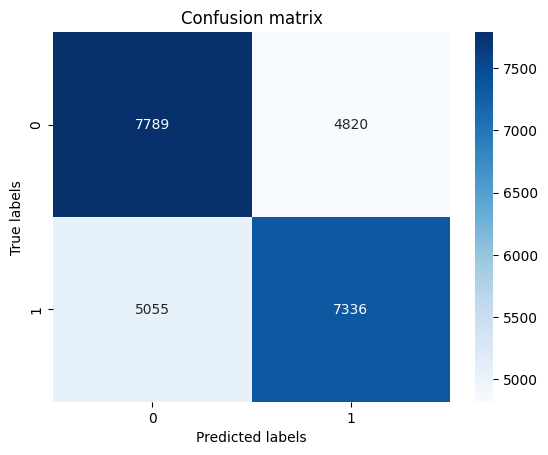

Test Loss: 0.6714892387390137, Test Accuracy: 0.6050000190734863
              precision    recall  f1-score   support

           0       0.61      0.62      0.61     12609
           1       0.60      0.59      0.60     12391

    accuracy                           0.60     25000
   macro avg       0.60      0.60      0.60     25000
weighted avg       0.60      0.60      0.60     25000



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Add early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Change optimizer to RMSprop with a different learning rate
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0005)

# Add L2 regularization to dense layers
regularizer = tf.keras.regularizers.l2(0.001)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(524, activation='relu'),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu', kernel_regularizer=regularizer),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=[early_stopping])
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

# Print the test loss and test accuracy
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

# Calculate the classification report
report = classification_report(y_test, y_pred_classes)

# Print the classification report
print(report)



Test accuracy is 60.5 % here.

### **XGBoost**<a name="xg"></a>

This code defines an XGBoost classifier with a maximum depth of 4, trains the model on the training data (X_train_scaled and y_train), makes predictions on the test data (X_test_scaled), and calculates the accuracy score using the accuracy_score function from sklearn.metrics. The accuracy score is then printed to the console.

Test Accuracy: 0.63264


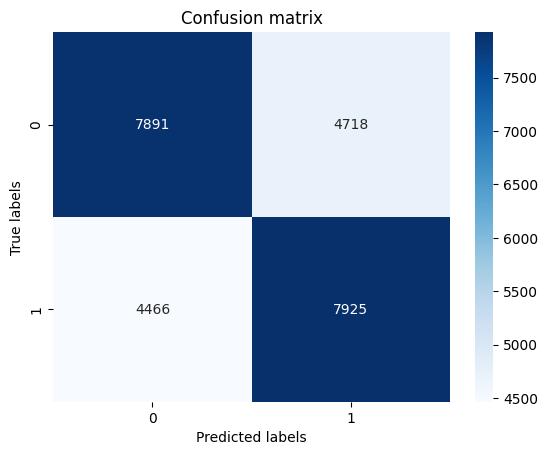

              precision    recall  f1-score   support

           0       0.64      0.63      0.63     12609
           1       0.63      0.64      0.63     12391

    accuracy                           0.63     25000
   macro avg       0.63      0.63      0.63     25000
weighted avg       0.63      0.63      0.63     25000



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



# Define the XGBoost classifier
model = xgb.XGBClassifier(max_depth=4)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.where(y_pred > 0.5, 1, 0)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()



# Calculate the classification report
report = classification_report(y_test, y_pred_classes)

# Print the classification report
print(report)


The XGBoost classifier has more accuracy than the above neural network models. Accuracy of XGBoost is 63.264 here.The recall score of 0.64 for class 1 indicates that out of all the actual churn customers in the test set, the model correctly identified 64% of them as churned. The precision score of 0.63 for class 1 indicates that out of all the predicted churn customers in the test set, only 63% of them actually churned. The F1 score of 0.63 for both classes indicates a balance between precision and recall for the model's predictions. The macro and weighted average scores of 0.63 also indicate a balanced performance of the model for both classes. Overall, the accuracy of 0.63 indicates that the model is correctly predicting the churn status of 63% of the customers in the test set.

## Trying a Naive Bayes Classifier<a name="nb"></a>

This code creates a Gaussian Naive Bayes classifier object, trains the classifier on the training data, predicts the class labels of the test data using the trained classifier, and then calculates the accuracy of the classifier on the test data. The predicted class labels of the test data are stored in y_pred and the accuracy of the classifier on the test data is printed. The confusion matrix is also calculated and displayed using seaborn and matplotlib.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Create a Naive Bayes classifier object
nb_clf = GaussianNB()

# Train the classifier on the training data
nb_clf.fit(X_train_scaled, y_train)

# Predict the class labels of the test data
y_pred_n = nb_clf.predict(X_test_scaled)

# Calculate the accuracy of the classifier on the test data
accuracy_1 = nb_clf.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy_1}")

# # Calculate the confusion matrix
# conf_mat_n = confusion_matrix(y_test, y_pred_n)

# # Display the confusion matrix
# sns.heatmap(conf_mat_n, annot=True, fmt='g', cmap='Blues')
# plt.xlabel('Predicted labels')
# plt.ylabel('True labels')
# plt.title('Confusion matrix')
# plt.show()


# # Calculate the classification report
# report = classification_report(y_test, y_pred_classes)

# # Print the classification report
# print(report)


Accuracy: 0.52484


The accuracy of naive bayes classifier is only 52 percentage.

## Conclusion<a name="con"></a>

The results from testing different neural networks show that none of the models achieved a very high accuracy, with all of them hovering around 60%. The first model had a simple architecture with four dense layers, but only achieved an accuracy of 59.8% after two epochs. The second model had a similar architecture with the addition of L2 regularization, but only achieved a slightly lower accuracy of 58.9% after 15 epochs. The third model had a more complex architecture with six dense layers, but only achieved an accuracy of 59.5% after 10 epochs. The final model had a similar architecture to the second model with the addition of early stopping, RMSprop optimizer with a different learning rate, and L2 regularization, but only achieved an accuracy of 60.5% after 20 epochs.

In addition to testing different neural network models, a Naive Bayes classifier was also tested on the same dataset, achieving an accuracy of 52.5%. These results suggest that the dataset may be particularly challenging for machine learning algorithms to accurately predict customer churn. It may be necessary to explore additional features or preprocessing steps, as well as other machine learning algorithms, such as  SVM, to improve the accuracy of the models. 

The XGBoost classifier gave maximum accuracy compared to other models,which is 63.2 percentage.

In conclusion, it seems that none of the tested neural network models were able to achieve a high accuracy on this particular dataset. It may be worth exploring other machine learning algorithms, such as SVM or Random Forest, to see if they can perform better on the given data. Additionally, further exploration could be done to determine if there are any additional features or preprocessing steps that could improve the accuracy of the models.